In [15]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [299]:
# Generate data
np.random.seed(1)
size = 100
mu_obs = np.random.normal(0,1,size=size)
sigma = 0.1
X = np.random.normal(mu_obs,sigma,size=size)

data = pd.DataFrame({'X': X})


[-5, 5, -5, 5]

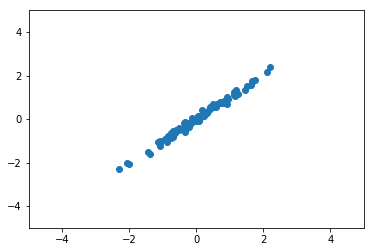

In [300]:
# Plot data
plt.plot(mu_obs,data['X'],'o')
plt.axis([-5, 5, -5, 5])

In [301]:
# Create probabilistic model
basic_model = pm.Model()
with basic_model:
    mu = pm.Normal('mu', mu=0, sd=1)
    sigma = 0.1
    X = pm.Normal('X', mu=mu, sd=sigma, observed = data['X'])


In [302]:
# Create posterior samples of unobserved RVs
nr_of_samples = 25
with basic_model:
    trace = pm.sample(nr_of_samples,chains=4)
#ppc = pm.sample_ppc(trace, samples=int(nr_of_samples*4/100), model=basic_model)

Only 25 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]
Sampling 4 chains: 100%|██████████| 2100/2100 [00:00<00:00, 5443.77draws/s]
/home/philipp/.local/lib/python3.7/site-packages/pymc3/sampling.py:476: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")


In [303]:
# Create posterior samples of observed RVs
size_ppc = len(trace['mu'])
X_ppc = np.random.normal(trace['mu'],sigma,size=size_ppc)

[-1, 1, -5, 5]

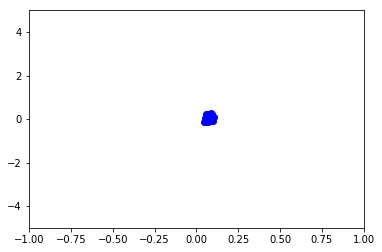

In [304]:
# Plot posterior samples
plt.plot(trace['mu'],X_ppc,'bo')
plt.axis([-1, 1, -5, 5])

In [305]:
X_ppc [1:5]

array([0.15751729, 0.17086078, 0.20420405, 0.12547702])

In [306]:
trace['mu'][1:5]

array([0.06373384, 0.06373384, 0.07208243, 0.08728766])

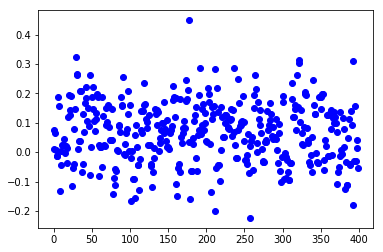

In [264]:
plt.plot(trace['mu'],'bo')